In [1]:
%cd /mnt/i/Yuki/workspace/exercises/Gasyori100knock

/mnt/i/Yuki/workspace/exercises/Gasyori100knock


https://github.com/yoyoyo-yo/Gasyori100knock/tree/master/Question_31_40

# 準備

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img_path = 'Question_31_40/imori.jpg'
img = cv2.imread(img_path)

gray_img_path = 'Question_31_40/imori_gray.jpg'
gray_img = cv2.imread(gray_img_path)

## OpenCV は BGR を採用しているので RGB に変換する
BGR を採用している理由は単なる歴史的経緯らしい

In [4]:
img = img[:, :, ::-1]
gray_img = gray_img[:, :, ::-1]

# 問題

## Q.31. アフィン変換(スキュー)

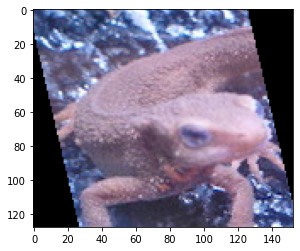

In [5]:
ax = 1.2
dx = 30

tx = 0
ty = 0

base = img.copy()
h = img.shape[0]

center_y = int(base.shape[0] / 2)
center_x = int(base.shape[1] / 2)

A = np.array([
    [1, dx / h, tx],
    [0, 1, ty],
    [0, 0, 1],
])
A_inv = np.linalg.inv(A)

ans = np.zeros((base.shape[0], int(base.shape[1] * ax), 3))
for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x - center_x * ax, y - center_y, 1]))
        base_x = int(base_x + center_x)
        base_y = int(base_y + center_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)

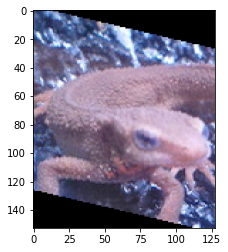

In [6]:
ay = 1.2
dy = 30

tx = 0
ty = 0

base = img.copy()
w = img.shape[1]

A = np.array([
    [1, 0, tx],
    [dy / w, 1, ty],
    [0, 0, 1],
])
A_inv = np.linalg.inv(A)

ans = np.zeros((int(base.shape[0] * ay), base.shape[1], 3))
for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x - center_x, y - center_y * ay, 1]))
        base_x = int(base_x + center_x)
        base_y = int(base_y + center_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)

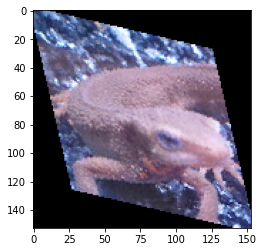

In [7]:
ax = 1.2
ay = 1.2
dx = 30
dy = 30

tx = 0
ty = 0

base = img.copy()
h = img.shape[0]
w = img.shape[1]

A = np.array([
    [1, dx / h, tx],
    [dy / w, 1, ty],
    [0, 0, 1],
])
A_inv = np.linalg.inv(A)

ans = np.zeros((int(base.shape[0] * ay), int(base.shape[1] * ax), 3))
for y in range(ans.shape[0]):
    for x in range(ans.shape[1]):
        base_x, base_y, _ = np.matmul(A_inv, np.array([x - center_x * ax, y - center_y * ay, 1]))
        base_x = int(base_x + center_x)
        base_y = int(base_y + center_y)
        if base_y < 0 or base.shape[0] <= base_y:
            continue
        if base_x < 0 or base.shape[1] <= base_x:
            continue
        ans[y, x] = base[base_y, base_x]

ans = ans.astype(np.uint8)
plt.imshow(ans)

## Q.32. フーリエ変換

In [8]:
base = img.copy().astype(np.complex)
H, W = base.shape[:2]

spectrum = np.zeros_like(base).astype(np.complex)
for k in range(spectrum.shape[0]):
    for l in range(spectrum.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * -2j * np.pi / H)
            w = np.exp(np.arange(W) * l * -2j * np.pi / W)
            spectrum[k, l, c] = np.matmul(v, np.matmul(base[:, :, c], w)) / H / W

In [9]:
recovered = np.zeros_like(spectrum).astype(np.complex)
for k in range(recovered.shape[0]):
    for l in range(recovered.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * 2j * np.pi / H)
            w = np.exp(np.arange(W) * l * 2j * np.pi / W)
            recovered[k, l, c] = np.matmul(v, np.matmul(spectrum[:, :, c], w))
recovered = np.abs(recovered).astype(np.uint8)

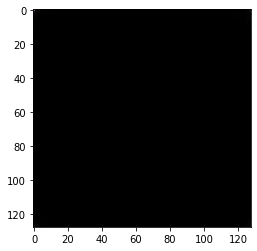

In [10]:
spectrum_normalized = np.abs(spectrum)
spectrum_normalized = (spectrum_normalized - np.min(spectrum_normalized)) / (np.max(spectrum_normalized) - np.min(spectrum_normalized)) * 255
spectrum_normalized = spectrum_normalized.astype(np.uint8)

plt.imshow(spectrum_normalized)

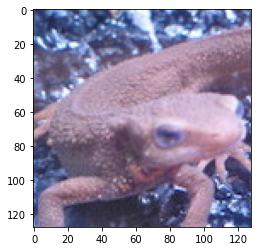

In [11]:
plt.imshow(recovered)

## Q.33. フーリエ変換 ローパスフィルタ

In [12]:
base = img.copy().astype(np.complex)
H, W = base.shape[:2]

spectrum = np.zeros_like(base).astype(np.complex)
for k in range(spectrum.shape[0]):
    for l in range(spectrum.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * -2j * np.pi / H)
            w = np.exp(np.arange(W) * l * -2j * np.pi / W)
            spectrum[k, l, c] = np.matmul(v, np.matmul(base[:, :, c], w)) / H / W

In [13]:
replaced = np.zeros_like(spectrum)
replaced[:H//2, :W//2] = spectrum[H//2:, W//2:]
replaced[:H//2, W//2:] = spectrum[H//2:, :W//2]
replaced[H//2:, :W//2] = spectrum[:H//2, W//2:]
replaced[H//2:, W//2:] = spectrum[:H//2, :W//2]

r = (H * H + W * W) ** 0.5 / 2
dist = (
    (np.expand_dims(np.arange(H), axis=1) - H / 2) ** 2 + 
    (np.expand_dims(np.arange(W), axis=0) - W / 2) ** 2
) ** 0.5
mask = dist < r / 2
replaced *= np.expand_dims(mask, 2)

spectrum[:H//2, :W//2] = replaced[H//2:, W//2:]
spectrum[:H//2, W//2:] = replaced[H//2:, :W//2]
spectrum[H//2:, :W//2] = replaced[:H//2, W//2:]
spectrum[H//2:, W//2:] = replaced[:H//2, :W//2]

In [14]:
recovered = np.zeros_like(spectrum).astype(np.complex)
for k in range(recovered.shape[0]):
    for l in range(recovered.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * 2j * np.pi / H)
            w = np.exp(np.arange(W) * l * 2j * np.pi / W)
            recovered[k, l, c] = np.matmul(v, np.matmul(spectrum[:, :, c], w))
recovered = np.abs(recovered).astype(np.uint8)

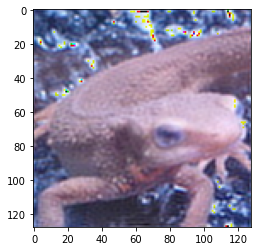

In [15]:
plt.imshow(recovered)

## Q.34. フーリエ変換　ハイパスフィルタ

In [16]:
base = img.copy().astype(np.complex)
H, W = base.shape[:2]

spectrum = np.zeros_like(base).astype(np.complex)
for k in range(spectrum.shape[0]):
    for l in range(spectrum.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * -2j * np.pi / H)
            w = np.exp(np.arange(W) * l * -2j * np.pi / W)
            spectrum[k, l, c] = np.matmul(v, np.matmul(base[:, :, c], w)) / H / W

In [17]:
replaced = np.zeros_like(spectrum)
replaced[:H//2, :W//2] = spectrum[H//2:, W//2:]
replaced[:H//2, W//2:] = spectrum[H//2:, :W//2]
replaced[H//2:, :W//2] = spectrum[:H//2, W//2:]
replaced[H//2:, W//2:] = spectrum[:H//2, :W//2]

r = (H * H + W * W) ** 0.5 / 2
dist = (
    (np.expand_dims(np.arange(H), axis=1) - H / 2) ** 2 + 
    (np.expand_dims(np.arange(W), axis=0) - W / 2) ** 2
) ** 0.5
mask = dist > r / 10
replaced *= np.expand_dims(mask, 2)

spectrum[:H//2, :W//2] = replaced[H//2:, W//2:]
spectrum[:H//2, W//2:] = replaced[H//2:, :W//2]
spectrum[H//2:, :W//2] = replaced[:H//2, W//2:]
spectrum[H//2:, W//2:] = replaced[:H//2, :W//2]

In [18]:
recovered = np.zeros_like(spectrum).astype(np.complex)
for k in range(recovered.shape[0]):
    for l in range(recovered.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * 2j * np.pi / H)
            w = np.exp(np.arange(W) * l * 2j * np.pi / W)
            recovered[k, l, c] = np.matmul(v, np.matmul(spectrum[:, :, c], w))
recovered = np.abs(recovered).astype(np.uint8)

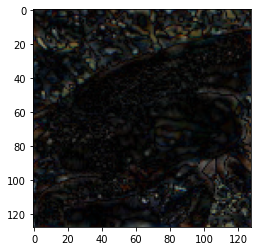

In [19]:
plt.imshow(recovered)

## Q.35. フーリエ変換 バンドパスフィルタ

In [20]:
base = img.copy().astype(np.complex)
H, W = base.shape[:2]

spectrum = np.zeros_like(base).astype(np.complex)
for k in range(spectrum.shape[0]):
    for l in range(spectrum.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * -2j * np.pi / H)
            w = np.exp(np.arange(W) * l * -2j * np.pi / W)
            spectrum[k, l, c] = np.matmul(v, np.matmul(base[:, :, c], w)) / H / W

In [21]:
replaced = np.zeros_like(spectrum)
replaced[:H//2, :W//2] = spectrum[H//2:, W//2:]
replaced[:H//2, W//2:] = spectrum[H//2:, :W//2]
replaced[H//2:, :W//2] = spectrum[:H//2, W//2:]
replaced[H//2:, W//2:] = spectrum[:H//2, :W//2]

r = (H * H + W * W) ** 0.5 / 2
dist = (
    (np.expand_dims(np.arange(H), axis=1) - H / 2) ** 2 + 
    (np.expand_dims(np.arange(W), axis=0) - W / 2) ** 2
) ** 0.5
mask = (r / 10 < dist) * (dist < r / 2)
replaced *= np.expand_dims(mask, 2)

spectrum[:H//2, :W//2] = replaced[H//2:, W//2:]
spectrum[:H//2, W//2:] = replaced[H//2:, :W//2]
spectrum[H//2:, :W//2] = replaced[:H//2, W//2:]
spectrum[H//2:, W//2:] = replaced[:H//2, :W//2]

In [22]:
recovered = np.zeros_like(spectrum).astype(np.complex)
for k in range(recovered.shape[0]):
    for l in range(recovered.shape[1]):
        for c in range(3):
            v = np.exp(np.arange(H) * k * 2j * np.pi / H)
            w = np.exp(np.arange(W) * l * 2j * np.pi / W)
            recovered[k, l, c] = np.matmul(v, np.matmul(spectrum[:, :, c], w))
recovered = np.abs(recovered).astype(np.uint8)

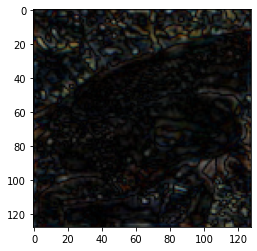

In [23]:
plt.imshow(recovered)

## Q.36. JPEG圧縮 (Step.1)離散コサイン変換

In [24]:
T = 8

h = T
w = T

base = img.copy().astype(np.float)
H, W, C = base.shape

base = base.reshape(H // h, h, W // w, w, C).transpose(1, 3, 0, 2, 4).reshape(h, w, -1)
spectrum = np.zeros_like(base).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(spectrum.shape[2]):
            v1 = np.cos((np.arange(T) * 2 + 1) * k * np.pi / 2 / T)
            v2 = np.cos((np.arange(T) * 2 + 1) * l * np.pi / 2 / T)
            spectrum[k, l, c] = np.matmul(v1, np.matmul(base[:, :, c], v2))

spectrum *= 2 / T
spectrum[0, :] /= np.sqrt(2)
spectrum[:, 0] /= np.sqrt(2)

In [25]:
K = 8

recovered = np.zeros_like(spectrum).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(recovered.shape[2]):
            v1 = np.cos(np.arange(K) * (2 * k + 1) * np.pi / 2 / T)
            v1[0] /= np.sqrt(2)
            v2 = np.cos(np.arange(K) * (2 * l + 1) * np.pi / 2 / T)
            v2[0] /= np.sqrt(2)
            recovered[k, l, c] = np.matmul(v1, np.matmul(spectrum[:K, :K, c], v2))

recovered *= 2 / T
recovered = recovered.reshape(h, w, H // h, W // w, C).transpose(2, 0, 3, 1, 4).reshape(H, W, C)
recovered = np.clip(np.abs(recovered), 0, 255).astype(np.uint8)

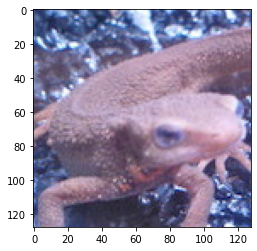

In [26]:
plt.imshow(recovered)

## Q.37. PSNR

In [27]:
T = 8

h = T
w = T

base = img.copy().astype(np.float)
H, W, C = base.shape

base = base.reshape(H // h, h, W // w, w, C).transpose(1, 3, 0, 2, 4).reshape(h, w, -1)
spectrum = np.zeros_like(base).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(spectrum.shape[2]):
            v1 = np.cos((np.arange(T) * 2 + 1) * k * np.pi / 2 / T)
            v2 = np.cos((np.arange(T) * 2 + 1) * l * np.pi / 2 / T)
            spectrum[k, l, c] = np.matmul(v1, np.matmul(base[:, :, c], v2))

spectrum *= 2 / T
spectrum[0, :] /= np.sqrt(2)
spectrum[:, 0] /= np.sqrt(2)

In [28]:
K = 4

recovered = np.zeros_like(spectrum).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(recovered.shape[2]):
            v1 = np.cos(np.arange(K) * (2 * k + 1) * np.pi / 2 / T)
            v1[0] /= np.sqrt(2)
            v2 = np.cos(np.arange(K) * (2 * l + 1) * np.pi / 2 / T)
            v2[0] /= np.sqrt(2)
            recovered[k, l, c] = np.matmul(v1, np.matmul(spectrum[:K, :K, c], v2))

recovered *= 2 / T
recovered = recovered.reshape(h, w, H // h, W // w, C).transpose(2, 0, 3, 1, 4).reshape(H, W, C)
recovered = np.clip(np.abs(recovered), 0, 255).astype(np.uint8)

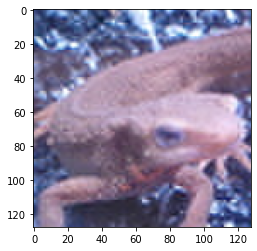

In [29]:
plt.imshow(recovered)

In [30]:
base = base.reshape(h, w, H // h, W // w, C).transpose(2, 0, 3, 1, 4).reshape(H, W, C).astype(np.float)
recovered = recovered.astype(np.float)
mse = np.mean((img - recovered) ** 2)
psnr = 10 * np.log10((np.max(recovered) ** 2) / mse)
bit_rate = 8 * K * K / 8 / 8

print(f'PSNR: {psnr}')
print(f'Bit Rate: {bit_rate}')

PSNR: 27.599853409070676
Bit Rate: 2.0


## Q.38. JPEG圧縮 (Step.2)DCT+量子化

In [31]:
T = 8

h = T
w = T

base = img.copy().astype(np.float)
H, W, C = base.shape

base = base.reshape(H // h, h, W // w, w, C).transpose(1, 3, 0, 2, 4).reshape(h, w, -1)
spectrum = np.zeros_like(base).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(spectrum.shape[2]):
            v1 = np.cos((np.arange(T) * 2 + 1) * k * np.pi / 2 / T)
            v2 = np.cos((np.arange(T) * 2 + 1) * l * np.pi / 2 / T)
            spectrum[k, l, c] = np.matmul(v1, np.matmul(base[:, :, c], v2))

spectrum *= 2 / T
spectrum[0, :] /= np.sqrt(2)
spectrum[:, 0] /= np.sqrt(2)

In [32]:
Q = np.array((
        (16, 11, 10, 16, 24, 40, 51, 61),
        (12, 12, 14, 19, 26, 58, 60, 55),
        (14, 13, 16, 24, 40, 57, 69, 56),
        (14, 17, 22, 29, 51, 87, 80, 62),
        (18, 22, 37, 56, 68, 109, 103, 77),
        (24, 35, 55, 64, 81, 104, 113, 92),
        (49, 64, 78, 87, 103, 121, 120, 101),
        (72, 92, 95, 98, 112, 100, 103, 99)
     ),
     dtype=np.float,
)
spectrum /= np.expand_dims(Q, 2)
spectrum = np.round(spectrum)
spectrum *= np.expand_dims(Q, 2)

In [33]:
K = 4

recovered = np.zeros_like(spectrum).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(recovered.shape[2]):
            v1 = np.cos(np.arange(K) * (2 * k + 1) * np.pi / 2 / T)
            v1[0] /= np.sqrt(2)
            v2 = np.cos(np.arange(K) * (2 * l + 1) * np.pi / 2 / T)
            v2[0] /= np.sqrt(2)
            recovered[k, l, c] = np.matmul(v1, np.matmul(spectrum[:K, :K, c], v2))

recovered *= 2 / T
recovered = recovered.reshape(h, w, H // h, W // w, C).transpose(2, 0, 3, 1, 4).reshape(H, W, C)
recovered = np.clip(np.abs(recovered), 0, 255).astype(np.uint8)

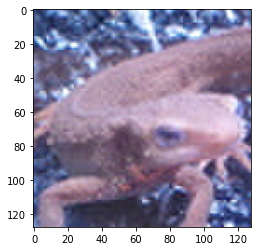

In [34]:
plt.imshow(recovered)

In [35]:
cv2.imwrite('my_notebooks/q38_answer.jpg', recovered[:, :, ::-1])

True

## Q.39. JPEG圧縮 (Step.3)YCbCr表色系

In [36]:
def rgb_to_ycbcr(rgb):
    ycbcr = np.zeros_like(rgb)

    ycbcr[..., 0] = 0.299 * rgb[..., 0] + 0.5870 * rgb[..., 1] + 0.114 * rgb[..., 2]
    ycbcr[..., 1] = -0.1687 * rgb[..., 0] - 0.3313 * rgb[..., 1] + 0.5 * rgb[..., 2] + 128
    ycbcr[..., 2] = 0.5 * rgb[..., 0] - 0.4187 * rgb[..., 1] - 0.0813 * rgb[..., 2] + 128

    return ycbcr

def ycbcr_to_rgb(ycbcr):
    rgb = np.zeros_like(ycbcr)

    rgb[..., 0] = ycbcr[..., 0] + (ycbcr[..., 2] - 128) * 1.402
    rgb[..., 1] = ycbcr[..., 0] - (ycbcr[..., 1] - 128) * 0.3441 - (ycbcr[..., 2] - 128) * 0.7139
    rgb[..., 2] = ycbcr[..., 0] + (ycbcr[..., 1] - 128) * 1.7718
    
    return rgb

In [37]:
base = img.copy().astype(np.float)
converted = rgb_to_ycbcr(base)
answer = ycbcr_to_rgb(converted)
answer = answer.astype(np.uint8)

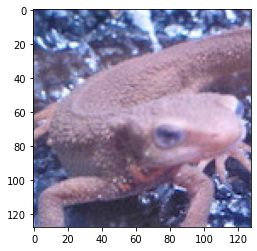

In [38]:
plt.imshow(answer)

## Q.40. JPEG圧縮 (Step.4)YCbCr+DCT+量子化

In [39]:
def rgb_to_ycbcr(rgb):
    ycbcr = np.zeros_like(rgb)

    ycbcr[..., 0] = 0.299 * rgb[..., 0] + 0.5870 * rgb[..., 1] + 0.114 * rgb[..., 2]
    ycbcr[..., 1] = -0.1687 * rgb[..., 0] - 0.3313 * rgb[..., 1] + 0.5 * rgb[..., 2] + 128
    ycbcr[..., 2] = 0.5 * rgb[..., 0] - 0.4187 * rgb[..., 1] - 0.0813 * rgb[..., 2] + 128

    return ycbcr

def ycbcr_to_rgb(ycbcr):
    rgb = np.zeros_like(ycbcr)

    rgb[..., 0] = ycbcr[..., 0] + (ycbcr[..., 2] - 128) * 1.402
    rgb[..., 1] = ycbcr[..., 0] - (ycbcr[..., 1] - 128) * 0.3441 - (ycbcr[..., 2] - 128) * 0.7139
    rgb[..., 2] = ycbcr[..., 0] + (ycbcr[..., 1] - 128) * 1.7718
    
    return rgb

In [40]:
T = 8

h = T
w = T

base = img.copy().astype(np.float)
base = rgb_to_ycbcr(base)
H, W, C = base.shape

base = base.reshape(H // h, h, W // w, w, C).transpose(1, 3, 0, 2, 4).reshape(h, w, -1)
spectrum = np.zeros_like(base).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(spectrum.shape[2]):
            v1 = np.cos((np.arange(T) * 2 + 1) * k * np.pi / 2 / T)
            v2 = np.cos((np.arange(T) * 2 + 1) * l * np.pi / 2 / T)
            spectrum[k, l, c] = np.matmul(v1, np.matmul(base[:, :, c], v2))

spectrum *= 2 / T
spectrum[0, :] /= np.sqrt(2)
spectrum[:, 0] /= np.sqrt(2)

In [41]:
Q1 = np.array((
        (16, 11, 10, 16, 24, 40, 51, 61),
        (12, 12, 14, 19, 26, 58, 60, 55),
        (14, 13, 16, 24, 40, 57, 69, 56),
        (14, 17, 22, 29, 51, 87, 80, 62),
        (18, 22, 37, 56, 68, 109, 103, 77),
        (24, 35, 55, 64, 81, 104, 113, 92),
        (49, 64, 78, 87, 103, 121, 120, 101),
        (72, 92, 95, 98, 112, 100, 103, 99)
     ),
     dtype=np.float,
)
Q2 = np.array((
        (17, 18, 24, 47, 99, 99, 99, 99),
        (18, 21, 26, 66, 99, 99, 99, 99),
        (24, 26, 56, 99, 99, 99, 99, 99),
        (47, 66, 99, 99, 99, 99, 99, 99),
        (99, 99, 99, 99, 99, 99, 99, 99),
        (99, 99, 99, 99, 99, 99, 99, 99),
        (99, 99, 99, 99, 99, 99, 99, 99),
        (99, 99, 99, 99, 99, 99, 99, 99)
    ),
    dtype=np.float,
)

spectrum[..., 0] /= Q1
spectrum[..., 1] /= Q2
spectrum[..., 2] /= Q2
spectrum = np.round(spectrum)
spectrum[..., 0] *= Q1
spectrum[..., 1] *= Q2
spectrum[..., 2] *= Q2

In [42]:
K = 8

recovered = np.zeros_like(spectrum).astype(np.float)
for k in range(h):
    for l in range(w):
        for c in range(recovered.shape[2]):
            v1 = np.cos(np.arange(K) * (2 * k + 1) * np.pi / 2 / T)
            v1[0] /= np.sqrt(2)
            v2 = np.cos(np.arange(K) * (2 * l + 1) * np.pi / 2 / T)
            v2[0] /= np.sqrt(2)
            recovered[k, l, c] = np.matmul(v1, np.matmul(spectrum[:K, :K, c], v2))

recovered *= 2 / T
recovered = recovered.reshape(h, w, H // h, W // w, C).transpose(2, 0, 3, 1, 4).reshape(H, W, C)
recovered = np.clip(np.abs(recovered), 0, 255)

recovered = ycbcr_to_rgb(recovered)
recovered = recovered.astype(np.uint8)

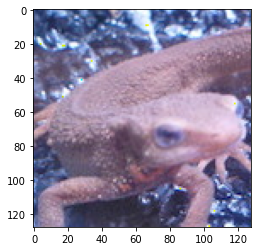

In [43]:
plt.imshow(recovered)

In [44]:
cv2.imwrite('my_notebooks/q40_answer.jpg', recovered[:, :, ::-1])

True